In [1]:
cd ..

C:\Users\Sommer Lab\Documents\Analysis Code


In [2]:
import sys
# sys.path.append(r'C:\Users\Sommer Lab\Documents\Analysis Code')
import os

# from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from ImageAnalysis import ImageAnalysisCode

In [3]:
totalDataPath =r"Z:\ats317group\Data"
date = '10/10/2023'


In [4]:
dataCSV_filename = 'cMOT 0.2 and 0.45 with different bias.csv'

dayFolderPath = ImageAnalysisCode.GetDataLocation(date, DataPath=totalDataPath)
dataCSV_filePath = os.path.join(dayFolderPath, dataCSV_filename)

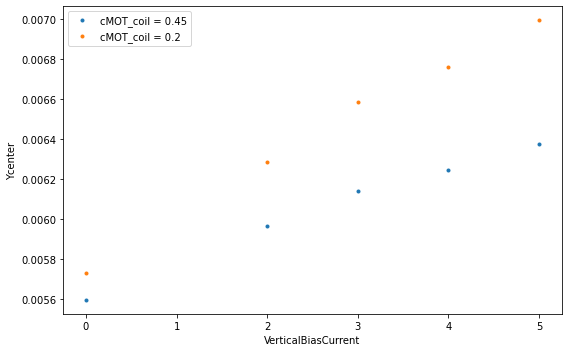

In [5]:
ImageAnalysisCode.PlotFromDataCSV(dataCSV_filePath, 'VerticalBiasCurrent', 'Ycenter', iterateVariable='cMOT_coil')

In [6]:
dataCSV_filename = 'ODT Move.csv'

dayFolderPath = ImageAnalysisCode.GetDataLocation(date, DataPath=totalDataPath)
dataCSV_filePath = os.path.join(dayFolderPath, dataCSV_filename)

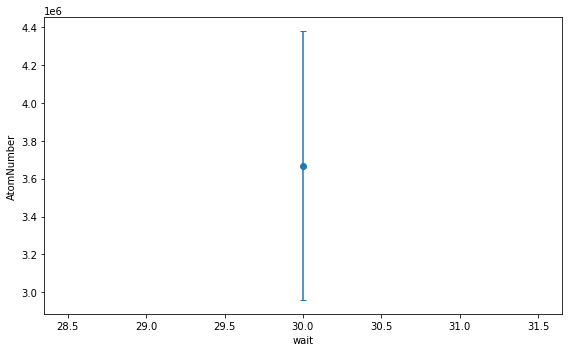

,time,Folder,Ycenter,Ywidth,AtomNumber,Xcenter,Xwidth,AtomNumberX,IterationNum,IterationCount,...,VerticalBiasCurrent,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,HighServo1,LowServo1,D1Time_ms,ODT_Position,Var_27,Var_28
2,2023-10-10 13:25:27.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,9.0,NaN,NaN
5,2023-10-10 13:27:15.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,9.0,NaN,NaN
25,2023-10-10 15:56:06.110,Andor/Position 1,0.005572,0.001023,4.395981e+06,3.708893e+06,1.219154e+06,2.600261e+15,1.0,6.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,1.0,0.0,0.0
27,2023-10-10 15:56:18.950,Andor/Position 1,0.005704,0.000904,3.635127e+06,3.272270e+00,5.521562e-02,1.215044e+06,3.0,6.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,1.0,0.0,0.0
29,2023-10-10 15:56:31.900,Andor/Position 1,0.006009,0.000845,2.975474e+06,2.174602e-02,4.996874e-06,1.381320e+04,5.0,6.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,1.0,0.0,0.0


In [9]:
PlotFromDataCSV(dataCSV_filePath, 
                                  'wait', 'AtomNumber', 
                                  iterateVariable=None, filterlist=['wait==30'], groupby='wait')

In [ ]:
colum

In [15]:
ImageAnalysisCode.PlotFromDataCSV?

In [3]:
df = pd.read_csv(r'Z:\ats317group\Data\2023\09-2023\29 Sep 2023\Data Folder 5-9.csv')

In [4]:
dfwait30 = df[df.wait==30]

In [103]:
dataFrame = dfwait30
iterateVariableName = 'VerticalBiasCurrent'
xVariable = 'Ycenter'
yVariable = 'AtomNumber'
groupby = None

iterateVariable = dataFrame[iterateVariableName]
iterateVariable = iterateVariable.unique()

In [42]:
def PlotFromDataCSV(filePath, xVariable, yVariable, 
                    groupby=None, groupbyX=None, iterateVariable=None, 
                    filterlist=None, filterLogic='and'):
    
    if not os.path.exists(filePath):
        raise FileNotFoundError("The file does not exist!")
    
    df = pd.read_csv(filePath)
    
    if filterlist:
        masklist = []
        for fil in filterlist:
            masklist.append(eval( 'df.' + fil.replace(' ', '_') ))
            
        if len(masklist) > 1:
            for mask in masklist[1:]:
                if filterLogic == 'and':
                    masklist[0] &= mask
                elif filterLogic == 'or':
                    masklist[0] |= mask
        df = df[ masklist[0] ]
    
    columnlist = [xVariable, yVariable]
    
    if iterateVariable:
        iterateVariable.replace(' ', '_')
        iterable = df[iterateVariable].unique()
        columnlist.append(iterateVariable)
    else:
        iterable = [None]
    
    if groupby == xVariable:
        groupbyX = 1
        
    if groupby and not groupbyX:
        groupby.replace(' ', '_')
        columnlist.append(groupby)    
    
    fig, ax = plt.subplots(figsize=(8,5))
    for ii in iterable:
        if ii is None:
            dfii = df[columnlist]
        else:
            dfii = df[columnlist][ (df[iterateVariable]==ii) ]
            
        if groupbyX:
            dfiimean = dfii.groupby(xVariable).mean()
            dfiistd = dfii.groupby(xVariable).std()
            plt.errorbar(dfiimean.index, dfiimean[yVariable],
                         dfiistd[yVariable], capsize=3,
                         label = '{} = {}'.format(iterateVariable, ii))
            plt.scatter(dfiimean.index, dfiimean[yVariable], s=8)
        elif groupby:
            dfiimean = dfii.groupby(groupby).mean()
            dfiistd = dfii.groupby(groupby).std()
            plt.errorbar(dfiimean[xVariable], dfiimean[yVariable],
                         dfiistd[yVariable], dfiistd[xVariable], capsize=3,
                         label = '{} = {}'.format(iterateVariable, ii))        
        else:
            plt.plot( dfii[xVariable], dfii[yVariable], '.', 
                     label = '{} = {}'.format(iterateVariable, ii))
    
    ax.set(xlabel=xVariable, ylabel=yVariable)
    fig.tight_layout()
    if iterateVariable:
        plt.legend()
    plt.show()
    
    return df

In [17]:
df1

NameError: name 'df1' is not defined

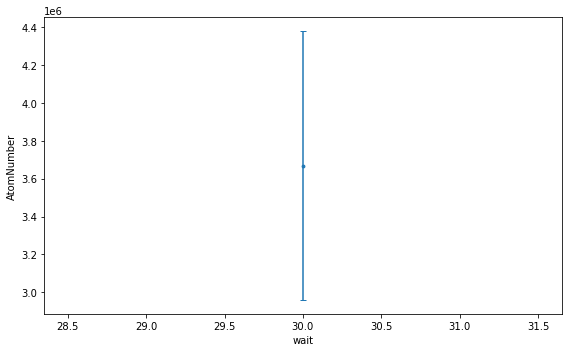

In [44]:
df = PlotFromDataCSV(dataCSV_filePath, 
                                  'wait', 'AtomNumber', 
                                  iterateVariable=None, filterlist=['wait==30'], groupby='wait');


In [47]:
df

,time,Folder,Ycenter,Ywidth,AtomNumber,Xcenter,Xwidth,AtomNumberX,IterationNum,IterationCount,...,VerticalBiasCurrent,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,HighServo1,LowServo1,D1Time_ms,ODT_Position,Var_27,Var_28
2,2023-10-10 13:25:27.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,9.0,NaN,NaN
5,2023-10-10 13:27:15.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,9.0,NaN,NaN
25,2023-10-10 15:56:06.110,Andor/Position 1,0.005572,0.001023,4.395981e+06,3.708893e+06,1.219154e+06,2.600261e+15,1.0,6.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,1.0,0.0,0.0
27,2023-10-10 15:56:18.950,Andor/Position 1,0.005704,0.000904,3.635127e+06,3.272270e+00,5.521562e-02,1.215044e+06,3.0,6.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,1.0,0.0,0.0
29,2023-10-10 15:56:31.900,Andor/Position 1,0.006009,0.000845,2.975474e+06,2.174602e-02,4.996874e-06,1.381320e+04,5.0,6.0,...,0.0,1.44,0.322,0.377,2.2,0.0,1.5,1.0,0.0,0.0


In [55]:
df1 = df[['wait', 'AtomNumber', 'ODT_Position']]
df1

,wait,AtomNumber,ODT_Position
2,30.0,NaN,9.0
5,30.0,NaN,9.0
25,30.0,4.395981e+06,1.0
27,30.0,3.635127e+06,1.0
29,30.0,2.975474e+06,1.0


In [56]:
df1mean = df1.groupby('ODT_Position').mean()
df1std = df1.groupby('ODT_Position').std()

In [57]:
df1mean

,wait,AtomNumber
ODT_Position,,
1.0,30.0,3.668861e+06
9.0,30.0,NaN


In [58]:
df1std

,wait,AtomNumber
ODT_Position,,
1.0,0.0,710853.980234
9.0,0.0,NaN


In [28]:
plt.errorbar(df1mean['index'], df1mean.ODT_Position, df1std.ODT_Position)

KeyError: 'index'

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


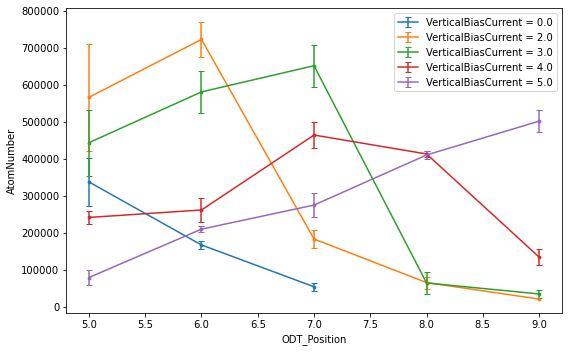

,time,Folder,Ycenter,Ywidth,AtomNumber,Xcenter,Xwidth,AtomNumberX,IterationNum,IterationCount,...,ZSBiasCurrent,CamBiasCurrent,VerticalBiasCurrent,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,HighServo1,LowServo1,D1Time_ms,ODT_Position
6,2023-09-29 14:42:38.060,Andor/ODT position 5,0.005941,0.000032,382163.016545,0.006425,1.780230e-04,44868.847209,5.0,10.0,...,6.0,0.0,0.0,1.440,0.322,0.377,2.2,0.0,1.5,5.0
7,2023-09-29 14:42:44.400,Andor/ODT position 5,0.005941,0.000035,667654.764206,0.006393,1.784179e-04,87323.446073,6.0,10.0,...,5.4,0.0,2.0,1.332,0.322,0.739,2.2,0.0,1.5,5.0
8,2023-09-29 14:42:50.940,Andor/ODT position 5,0.005942,0.000034,506448.536238,0.006398,1.829580e-04,91125.141089,7.0,10.0,...,5.0,0.0,3.0,1.260,0.322,0.920,2.2,0.0,1.5,5.0
9,2023-09-29 14:42:57.360,Andor/ODT position 5,0.005940,0.000034,253945.244974,0.004286,1.447648e-03,311621.166996,8.0,10.0,...,4.9,0.0,4.0,1.242,0.322,1.101,2.2,0.0,1.5,5.0
10,2023-09-29 14:43:03.700,Andor/ODT position 5,0.005940,0.000039,92345.898805,0.005278,4.554724e-07,34.018114,9.0,10.0,...,4.7,0.0,5.0,1.206,0.322,1.282,2.2,0.0,1.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2023-09-29 15:51:52.120,Andor/ODT position 9,0.006624,0.000032,483184.929170,0.006293,1.760816e-04,112382.066963,19.0,30.0,...,4.7,0.0,5.0,1.206,0.322,1.282,2.2,0.0,1.5,9.0
137,2023-09-29 15:52:36.410,Andor/ODT position 9,0.006625,0.000022,20596.159677,-0.001687,4.083835e-03,94555.519187,26.0,30.0,...,5.4,0.0,2.0,1.332,0.322,0.739,2.2,0.0,1.5,9.0
138,2023-09-29 15:52:42.730,Andor/ODT position 9,0.006625,0.000029,39795.737906,0.011148,4.681665e-05,5496.461307,27.0,30.0,...,5.0,0.0,3.0,1.260,0.322,0.920,2.2,0.0,1.5,9.0
139,2023-09-29 15:52:49.070,Andor/ODT position 9,0.006623,0.000035,155893.462475,0.011454,2.059002e-04,19590.802186,28.0,30.0,...,4.9,0.0,4.0,1.242,0.322,1.101,2.2,0.0,1.5,9.0


In [46]:
path = 'Z:\\ats317group\\Data\\2023/09-2023/29 Sep 2023\\Data Folder 5-9.csv'
PlotFromDataCSV(path, 'Ycenter', 'AtomNumber', filterlist=['Ywidth<0.00006', 'wait==30'], 
                iterateVariable='VerticalBiasCurrent', groupby='ODT_Position')

[Text(0.5, 0, 'Ycenter'), Text(0, 0.5, 'AtomNumber')]

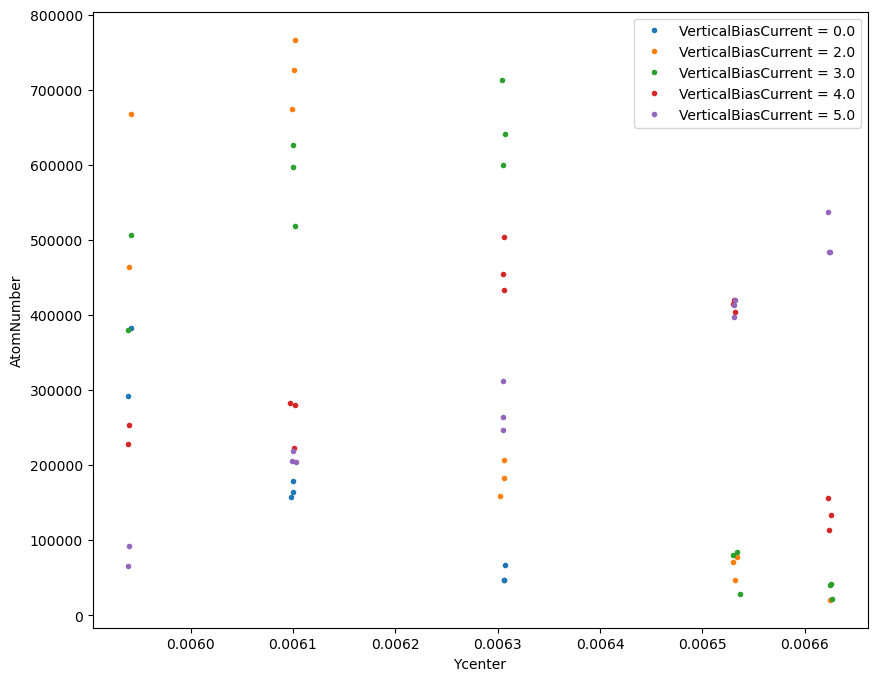

In [105]:
fig, ax = plt.subplots(figsize=(10,8))

for ii in (iterateVariable):
        
    if groupby:
        dfSelect = dfwait30[ (dfwait30.VerticalBiasCurrent==ii) & (dfwait30.Ywidth < 0.00006) ][[xVariable, yVariable, groupby]]
        dfmean = dfSelect.groupby(groupby).mean()
        dfstd = dfSelect.groupby(groupby).std()
        plt.errorbar( dfmean[xVariable], dfmean[yVariable], 
                     dfstd[yVariable], dfstd[xVariable], capsize=3, 
                     label = '{} = {}'.format(iterateVariableName, ii))
    else:
        dfSelect = dfwait30[ (dfwait30.VerticalBiasCurrent==ii) & (dfwait30.Ywidth < 0.00006) ][[xVariable, yVariable]]
        plt.plot( dfSelect[xVariable], dfSelect[yVariable], '.', label = '{} = {}'.format(iterateVariableName, ii))
    
plt.legend()
ax.set(xlabel=xVariable, ylabel=yVariable)

In [27]:
aa = np.arange(10).reshape(2,5)

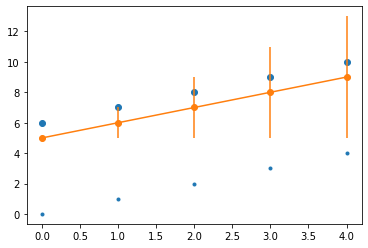

In [41]:
plt.plot(aa[0], '.')
plt.scatter(aa[0], aa[1]+1)
plt.errorbar(aa[0], aa[1], aa[0])
plt.scatter(aa[0], aa[1])